Liechti Matthieu, Loup Olivia

# Exercise 2 - Optional - Classification on MNIST

Using the SciKit Learn toolkit, train a multi-class logistic regression on the MNIST problem and compare the performances with the KNN of PW2.

For the “daring” ones, implement a multi-class version based on your own implementation and run it against MNIST data.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Binarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler, OneHotEncoder, \
    OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [7]:
train = pd.read_csv('mnist_train.csv')
X_train = train.drop('label', axis=1).values.reshape(-1,28,28)
y_train = train['label'].values

test = pd.read_csv('mnist_test.csv')
X_test = test.drop('label', axis=1).values.reshape(-1,28,28)
y_test = test['label'].values

In [8]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


**In a Jupyter environment, please return this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

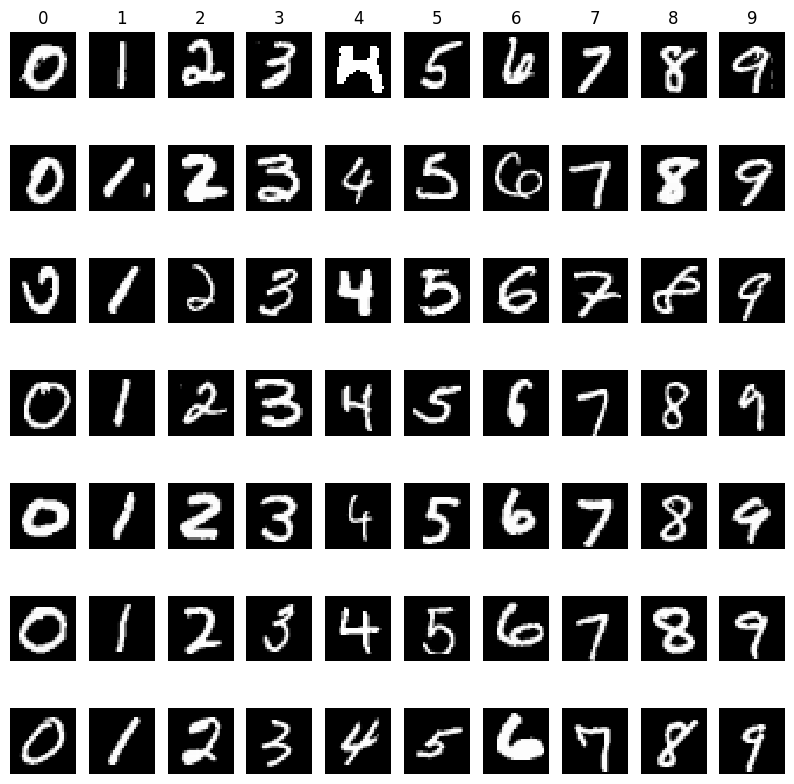

In [9]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [10]:
# TODO: train and test this data using logistic regression, you can use scikit-learn.
# You can subsample the data for training, because the set is large.
# You may need to put the data back to 1D.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 28*28))
X_test_scaled = scaler.transform(X_test.reshape(-1, 28*28)) 

samples = -1 #10000
X_train_samples = X_train_scaled[:samples]
y_train_samples = y_train[:samples]

classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
classifier.fit(X_train_samples, y_train_samples)

LogisticRegression(max_iter=5000, multi_class='multinomial')

Accuracy:  0.9208


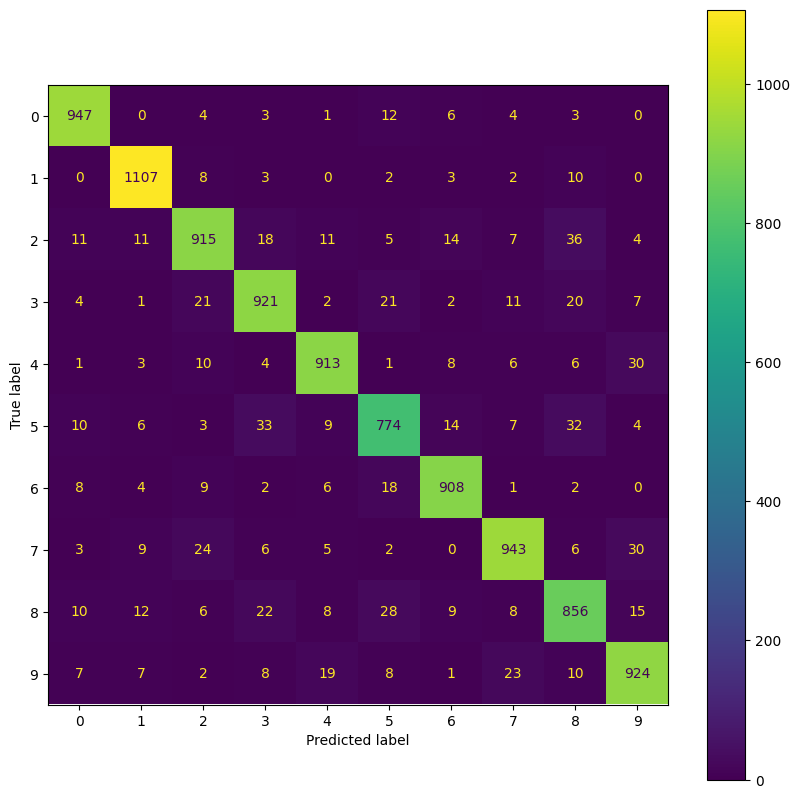

In [13]:
# Test the classifier
y_test_pred = classifier.predict(X_test_scaled)
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

# Print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=classes)
disp.plot()
plt.show()